In [23]:
import pandas as pd
from pandas.tseries.offsets import MonthBegin

In [36]:
gold_file = 'daily_gold_rate.csv'
crude_file = 'crude-oil-price.csv'
usd_file = 'rbi_usd_to_inr.csv'

In [15]:
def prepare_monthly_data(data2):
    data2['Month'] = data2['Date'].apply(lambda x: MonthBegin(0).rollback(x))
    g_data1 = data2.groupby(by='Month', as_index=False).mean()
    g_data1['Rate'] = round(g_data1['Rate'], 2)
    g_data1.rename({'Rate':'Month_Mean_Rate'}, axis=1, inplace=True)
    merge_data = pd.merge(left=data2, right=g_data1, on='Month')
    return merge_data

# Reading USD file

In [90]:
usd = pd.read_csv(usd_file)

In [91]:
usd.head()

,Date,Rate
0,2022-06-27,78.2890
1,2022-06-24,78.3308
2,2022-06-23,78.2662
3,2022-06-22,78.2115
4,2022-06-21,78.0861


In [92]:
usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5764 non-null   object 
 1   Rate    5764 non-null   float64
dtypes: float64(1), object(1)
memory usage: 90.2+ KB


In [93]:
usd['Date'] = pd.to_datetime(usd['Date'])

In [94]:
usd.rename({'Rate':'usd_rate'}, axis=1, inplace=True)

In [95]:
usd.head()

,Date,usd_rate
0,2022-06-27,78.2890
1,2022-06-24,78.3308
2,2022-06-23,78.2662
3,2022-06-22,78.2115
4,2022-06-21,78.0861


In [96]:
usd['Month'] = usd['Date'].apply(lambda x: MonthBegin(0).rollback(x))
usd_month = usd.groupby(by='Month', as_index=False).mean()

In [97]:
usd_month['usd_rate'] = round(usd_month['usd_rate'], 2)

In [98]:
usd_month.head()

,Month,usd_rate
0,1998-08-01,42.52
1,1998-09-01,42.52
2,1998-10-01,42.33
3,1998-11-01,42.38
4,1998-12-01,42.55


In [99]:
usd.head()

,Date,usd_rate,Month
0,2022-06-27,78.2890,2022-06-01
1,2022-06-24,78.3308,2022-06-01
2,2022-06-23,78.2662,2022-06-01
3,2022-06-22,78.2115,2022-06-01
4,2022-06-21,78.0861,2022-06-01


# Reading Gold File

In [100]:
gold = pd.read_csv(gold_file)

In [101]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9774 entries, 0 to 9773
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9774 non-null   object 
 1   USD     9774 non-null   float64
 2   EUR     9774 non-null   float64
 3   GBP     9774 non-null   float64
 4   INR     9774 non-null   float64
 5   AED     9774 non-null   float64
 6   CNY     9770 non-null   float64
dtypes: float64(6), object(1)
memory usage: 534.6+ KB


In [102]:
gold.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1985-01-01,308.30,402.45,266.01,3825.85,1134.42,NaN
1,1985-01-02,305.50,401.49,266.00,3787.05,1134.42,NaN
2,1985-01-03,302.30,397.08,262.76,3718.88,1107.67,NaN
3,1985-01-04,303.15,397.15,262.58,3759.64,1118.21,NaN
4,1985-01-07,298.25,392.55,261.17,3741.23,1091.58,835.8


In [103]:
gold = gold[['Date', 'INR']]
gold.head()

,Date,INR
0,1985-01-01,3825.85
1,1985-01-02,3787.05
2,1985-01-03,3718.88
3,1985-01-04,3759.64
4,1985-01-07,3741.23


Daily gold rate from 1985 to Present per troy ounce in their national currency( 1 t oz = 31.1g). Cconeerting the rates to per grams

In [104]:
gold['INR'] = gold['INR']/31.1

In [105]:
gold.head()

,Date,INR
0,1985-01-01,123.017685
1,1985-01-02,121.770096
2,1985-01-03,119.578135
3,1985-01-04,120.888746
4,1985-01-07,120.296785


In [106]:
gold['Month'] = gold['Date'].apply(lambda x: MonthBegin(0).rollback(x))
gold_month = gold.groupby(by='Month', as_index=False).mean()

In [107]:
gold_month.head()

,Month,INR
0,1985-01-01,122.631134
1,1985-02-01,124.423071
2,1985-03-01,124.005527
3,1985-04-01,128.665580
4,1985-05-01,125.993597


In [108]:
gold_month['INR'] = round(gold_month['INR'], 2)
gold_month.rename({'INR':'gold_rate'}, axis=1, inplace=True)

In [109]:
gold_month.head()

,Month,gold_rate
0,1985-01-01,122.63
1,1985-02-01,124.42
2,1985-03-01,124.01
3,1985-04-01,128.67
4,1985-05-01,125.99


# Read Crude oil data

In [120]:
crude = pd.read_csv(crude_file)

In [121]:
crude.head()

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646396,1.36
2,1983-05-02T00:00:00,30.25,-1.240614,-0.38
3,1983-06-01T00:00:00,31.38,3.735537,1.13
4,1983-07-01T00:00:00,32.00,1.975781,0.62


Crude oil price in USD/Bbl from 1983 to present. Cconverting it to INR/Bbl

In [122]:
crude['date'] = pd.to_datetime(crude['date'])
crude.rename({'date': 'Date', 'price':'crude_rate'}, axis=1, inplace=True)

In [123]:
crude = crude[['Date','crude_rate']]

In [124]:
crude.head()

,Date,crude_rate
0,1983-03-30,29.27
1,1983-04-04,30.63
2,1983-05-02,30.25
3,1983-06-01,31.38
4,1983-07-01,32.00


In [125]:
crude_merge = pd.merge(left=crude, right=usd, on='Date')

In [126]:
crude_merge.head()

,Date,crude_rate,usd_rate,Month
0,1998-09-01,16.14,42.5206,1998-09-01
1,1998-11-02,11.22,42.2994,1998-11-01
2,1998-12-01,12.05,42.5804,1998-12-01
3,1999-01-04,12.75,42.5098,1999-01-01
4,1999-02-01,12.27,42.5007,1999-02-01


In [127]:
crude_merge['crude_rate'] = crude_merge['crude_rate']*crude_merge['usd_rate']

In [128]:
crude_merge.drop('usd_rate', axis=1, inplace=True)
crude = crude_merge

In [129]:
crude.head()

,Date,crude_rate,Month
0,1998-09-01,686.282484,1998-09-01
1,1998-11-02,474.599268,1998-11-01
2,1998-12-01,513.093820,1998-12-01
3,1999-01-04,541.999950,1999-01-01
4,1999-02-01,521.483589,1999-02-01


In [130]:
crude_month = crude.groupby(by='Month', as_index=False).mean()

In [132]:
crude_month['crude_rate'] = round(crude_month['crude_rate'], 2)

In [133]:
crude_month.head()

,Month,crude_rate
0,1998-09-01,686.28
1,1998-11-01,474.60
2,1998-12-01,513.09
3,1999-01-01,542.00
4,1999-02-01,521.48


# Merge all three

In [135]:
temp = pd.merge(left=gold_month, right=crude_month, on= 'Month')

In [137]:
fdata = pd.merge(left=temp, right=usd_month, on='Month')

In [140]:
fdata.sort_values(by='Month', inplace=True)

In [143]:
fdata.head()

,Month,gold_rate,crude_rate,usd_rate
0,1998-09-01,395.02,686.28,42.52
1,1998-11-01,400.81,474.60,42.38
2,1998-12-01,397.81,513.09,42.55
3,1999-01-01,392.50,542.00,42.51
4,1999-02-01,392.57,521.48,42.46


In [144]:
import matplotlib.pyplot as plt

In [148]:
plot1 = fdata.rename({'gold_rate':'gold_rate(x10)', 'crude_rate':'crude_rate(x10)'}, axis=1)

In [150]:
plot1['gold_rate(x10)'] = plot1['gold_rate(x10)']/10
plot1['crude_rate(x10)'] = plot1['crude_rate(x10)']/10

In [151]:
plot1.head()

,Month,gold_rate(x10),crude_rate(x10),usd_rate
0,1998-09-01,39.502,68.628,42.52
1,1998-11-01,40.081,47.460,42.38
2,1998-12-01,39.781,51.309,42.55
3,1999-01-01,39.250,54.200,42.51
4,1999-02-01,39.257,52.148,42.46


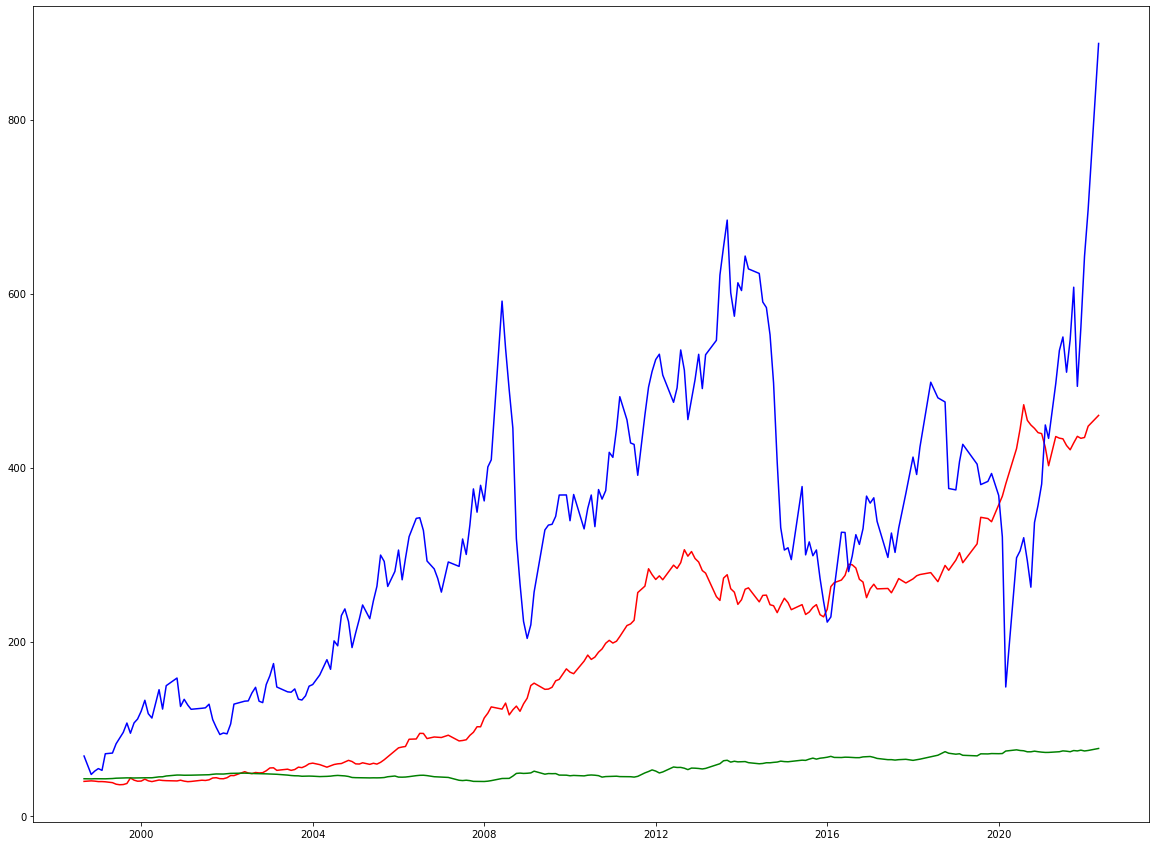

In [160]:
plt.figure(figsize=(20, 15))
plt.plot('Month', 'gold_rate(x10)', data=plot1, color='red')
plt.plot('Month', 'crude_rate(x10)', data=plot1, color='blue')
plt.plot('Month', 'usd_rate', data=plot1, color='green')
plt.show()

# corelation

In [161]:
fdata.corr()

,gold_rate,crude_rate,usd_rate
gold_rate,1.000000,0.711616,0.882414
crude_rate,0.711616,1.000000,0.486421
usd_rate,0.882414,0.486421,1.000000


In [162]:
import seaborn as sns

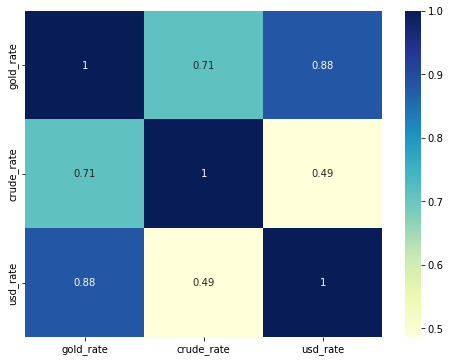

In [171]:
plt.figure(figsize=(8, 6))
sns.heatmap(fdata.corr(), annot=True, cmap='YlGnBu')
plt.show()

1. There is high positive correlation between Gold price and USD price of 0.88.
2. There is high positive correlation between Gold price and Curde oil price of 0.71.
3. There is very low correlation between Crude oil price and USD rate.

check 2 for its validity